# Código para los polinomios de Hermite probabilisticos.

Se espera que este código sirva como una demostración de los primeros 5 polinomios de hermite probabilisticos. Estos polinomios fueron obtenidos de la siguiente ecuación:

\begin{equation*}
\large H_n(x)=(-1)^ne^{\frac{x^2}{2}}\frac{d^n}{dx^n}e^{-\frac{x^2}{2}}
\end{equation*}

In [1]:
import math as math
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
#sns.set_style('darkgrid')
jtplot.style(theme='onedork')
jtplot.style(ticks=True, grid=True, figsize=(17, 7))

Aqui se coloca una función encargada de graficar y otra encargada de guardar los datos en un txt.

In [2]:
def grafica(x0,xf,x,H,n,Ix):
    plt.figure()
    plt.title('Polinomio de Hermite.')
    plt.plot(x,H,lw=1)
    plt.xlim(x0,xf)
    plt.show()

def txt(x,H,Ix,n):
    t1=open("hermite{0:.0f}.txt".format(n),"w")

    for i in range(0,Ix):
        t1.write(str(x[i])); t1.write(" "); t1.write(str(H[i]))
        t1.write("\n")

    t1.close()

Esta función es la encargada de calcular nuestros polinomios probabilisticos. Fueron resueltos a mano y posteriormente se coloco la expresión de la solución. 

In [3]:
def hermite_prob(x,n):
    if (n==0):
        H=1
    elif (n==1):
        H=x
    elif (n==2):
        H=np.exp(0.5*x*2)*(-np.exp(-0.5*x*x) +np.exp(-0.5*x**2)*(x**2))
    elif (n==3):
        H=-np.exp(0.5*x**2)*(3*np.exp(-0.5*x*x)*x-np.exp(-0.5*x*x)*(x**3))
    elif (n==4):
        H=np.exp(0.5*x*x)*(3*np.exp(-0.5*x*x)-6*np.exp(-0.5*x**2)*(x**2)+np.exp(-0.5*x**2)*(x**4))
    elif (n==5):
        H=-np.exp(0.5*x*x)*(-15*np.exp(-0.5*x*x)*x+10*np.exp(-0.5*x*x)*(x**3)-np.exp(-0.5*x*x)*(x**5))
    
    return H

Aqui colocamos una función que une a las funciones pasadas, donde calcula H[i] para nuestros primeros valores de H. Por otra parte, tambien los va guardando en un txt y posterior a eso los grafica.

In [4]:
def solucion():
    x0=-2
    xf=2
    Ix=50
    x=np.linspace(x0,xf,Ix)
    
    H=np.zeros(Ix)
    Hg=np.zeros((Ix,6))
    for n in range(0,6):
        for i in range(0,Ix):
            H[i]=hermite_prob(x[i],n)
            Hg[i,n]=H[i]
        #archivo=txt(x,H,Ix,n)
    
    graficar=grafica(x0,xf,x,Hg,n,Ix)

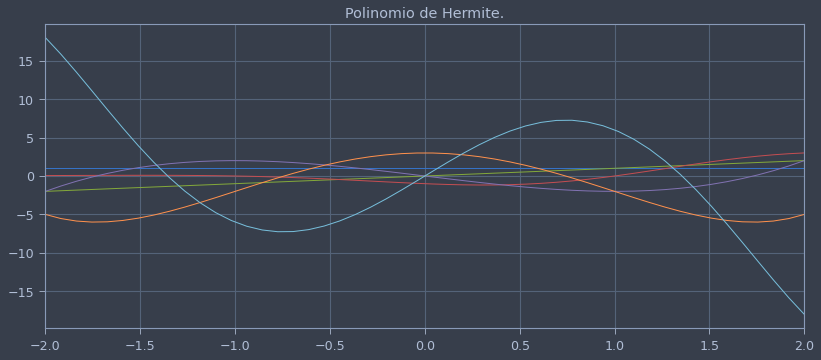

In [5]:
if ( __name__ == '__main__' ):
    problema=solucion()

Pero esto son las soluciones aproximadas. No podemos resolver numéricamente la sumatoria de N valores, por lo que necesitamos resolver la ecuación de forma distinta. Entonces, podemos normalizar los polinomios de Hermite y utilizando recursión, podremos resolver numéricamente la ecuación. Los polinomios normalizados son:

\begin{equation*}
\tilde{H}_n(x)=x\sqrt{\frac{2}{n}}\tilde{H}_{n-1}(x)-\sqrt{1-\frac{1}{n}}\tilde{H}_{n-2}(x)
\end{equation*}

Donde podemos utilizar estos valores iniciales ($H_0$ y $H_1$):

\begin{equation*}
\begin{array}{cc}
\tilde{H}_0(x)=e^{-\frac{x^2}{2}+ln|\frac{\pi}{2}|}, & \tilde{H}_1(x)=\sqrt{2}x\tilde{H}_0(x) \\
\end{array}
\end{equation*}

Entonces, esto queda en la siguiente función:

In [6]:
def hermite(x,n):
    Hant=0.0
    H=np.exp(-0.5*(x**2+0.5*np.log(np.pi)))

    if (n>0):
        for m in range(1,n+1):
            Hn=np.sqrt(2/m)*x*H-np.sqrt(1.0-1.0/m)*Hant
            Hant=H
            H=Hn
    return H

def solucion():
    x0=0  #La distancia inicial.
    xf=50 #La distancia final.
    Ix=5001 #La cantidad de pasos a dar.
    dx=(xf-x0)/Ix #El cambio infinitesimal entre un paso y otro.

    x=np.linspace(x0,xf,Ix) #El escrito de x marcado por los intervalos Ix.
    n=700 #Escogemos 50 n para el polinomio de Hermite.

    #Ahora generamos la matriz del sistema Hn(x).
    H=np.zeros(Ix)
    #Ahora, realizamos un ciclo for para los valores de Hn(x).
    for i in range(0,Ix-1):
        H[i]=hermite(x[i],n)

    #Una vez obtenemos los valores, los graficamos.
    graficar=grafica(x0,xf,x,H,n,Ix)
    #archivo=txt(x,H,Ix,n)

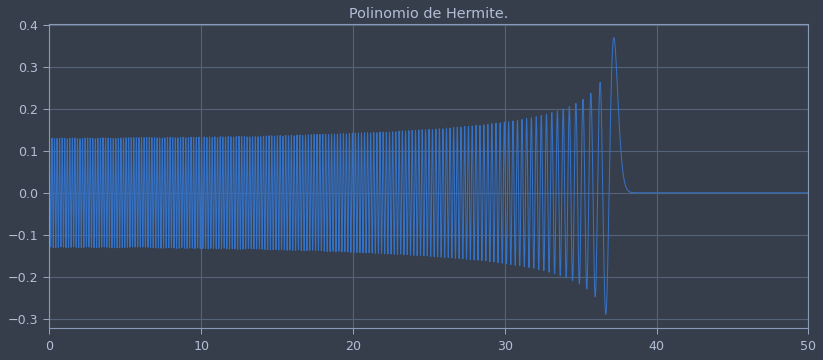

In [7]:
if ( __name__ == '__main__' ):
    problema=solucion()

## Esta solución es la autosolución del oscilador armónico.                               
                                                                                                    2/12/2020